
#### Teoría de Circuitos II

#  Tarea Semanal 1
#### Autor: Federico Rodriguez Vizzon
<img src="./ned.jpeg" align="left" width="150" /> 


## 1) Determinacion de la funcion transferencia de la red

 

Definimos las admitancias:

$G_{1}= \frac{1}{R_{1}}$ 

$G_{2}= \frac{1}{R_{2}}$ 

$G_{3}= sC_{1}$ 

$G_{4}= \frac{1}{R_{3}}$

Establecemos la tension $V_{x}$ en el nodo entre $G_{1}$ y $G_{2}$

Planteamos la ecuacion de nodos

$V_{x}(G_{3} + G_{4}) - V_{1}G_{3} = 0$ 

Despejando obtenemos la ecuacion (1):

$V_{x}= V_{1} \frac{G_{3}}{G_{3}G_{4}}$

Planteamos la segunda ecuacion:

$V_{x}(G_{1} + G_{2}) - V_{1}G_{1} - V_{2}G_{2} = 0$

Reemplazamos $V_{x}$ con (1) obtenemos

$V_{1}[ \frac{G_{3}}{G_{3}+G_{4}}(G_{1}+G_{2}) - G_{1} ] = V_{2}G_{2}$

Operando y despejando llegamos a

$T = \frac{G_{3} - \frac{G_{1}G_{4}}{G_{2}}}{G_{3} + G_{4}}$

Reemplanzdo G_{i} por los valores y despejando

$T(S) = \frac{S - \frac{R_{2}}{R_{1}R_{3}C_{1}}}{S + \frac{1}{R_{3}C_{1}}}$

Siendo $\omega_0 = \frac{1}{R_{3}C_{1}}$ llegmos a 

$T(S) = \frac{S - \frac{R_{2}}{R_{1}}\omega_0}{S + \omega_0}$






### Modulo, Fase y diagrama de polos y ceros.

Definimos $K = \frac{R_{2}}{R_{1}}$ y reemplazando $S = j\omega$

queda $T(j\omega) = \frac{j\omega - k\omega_0}{j\omega + \omega_0}$ 

Moulo:

$\mid T(j\omega) \mid = \sqrt{ \frac{\omega^2 + K^2\omega_0}{\omega^2 + \omega_0}} $

Fase:

$\phi(j\omega) = \arctan{\frac{\omega}{-k\omega_0}} - \arctan{\frac{\omega}{\omega_0}}$

Calculamos $\phi(j\omega)$ y $\mid T(j\omega) \mid$ para los siguientes valores de $\omega$

|$\omega$  |$\phi(j\omega)$|$\mid T(j\omega)\mid$ |
|:---------|:--------------|:---------------------|
|   0      |    1          |        0             |
|$\omega0$ |    1          |   $-\frac{\pi}{2}$   |
|  $\infty$|    1          |        $-\pi$        |

<img src="./respuesta.jpg" align="left" width="800" />


### Normalizando la transferencia

 $T(S) = \frac{S - \frac{R_{2}}{R_{1}}\omega_0}{S + \omega_0}$  (1) 
 
 Definimos como norma de frecuencia $\Omega_{\omega_0} = \omega_0 = \frac{1}{R_3C_1}$ y obtenemos $S = \$\omega_0$
 
 Reemplazamos el valor de $S$ en (1) obtenemos
 
 $T(\$) = \frac{\$\omega_0 - \frac{R_{2}}{R_{1}}\omega_0}{\$\omega_0 + \omega_0}$
 
 $C_1^* = \omega_0 C_1 = \frac{1}{R_3C_1}C_1$
 
 $C_1^* = \frac{1}{R_3}$
 
 Despejando llegamos a
 
 $T(\$) = \frac{\$ - \frac{R_{2}}{R_{1}}}{\$ + 1}$

 A continuacion adopatamos como norma de impedancia $\Omega_Z = R_1$ y nos queda:
 
 $R_1^* = \frac{R_1}{R_1} = 1$
 
 $R_2^* = \frac{R_2}{R_1} $
 
 y asi llegamos a: $T(\$) = \frac{\$ - R_2^*}{\$ + 1} $
 
 <img src="./circuito_normalizado_2.jpg" align="left" width="600"/>

 

In [2]:
# Módulos para Python, algo parecido a los #include de C

# módulos numéricos y de funciones científicas
import numpy as np
from scipy import signal as sig

# PyTC2: La librería para TC2
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys

In [3]:

import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento

plt.figure(1)
plt.close(1)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# Podés modificar el ancho y alto de los gráficos que generás
fig_sz_x = 14
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})


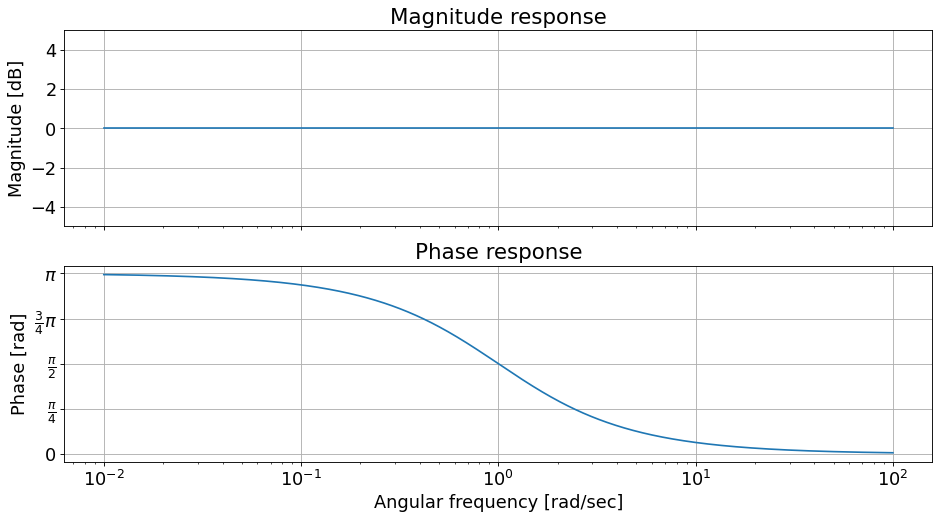

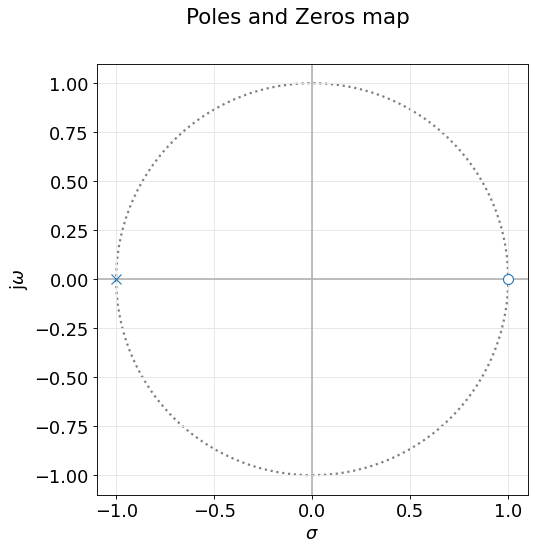

In [4]:
     
# Definimos los parámetros de la simulación

# Probar diferentes valores de Q
#################################

#Q = 1/3           # sobreamortiguado
#Q = 1/2  # amortiguamiento crítico  (son definiciones de T. de control)
Q = np.sqrt(2)/2             # subamortiguado

# Luego de analizar diferentes Q, probar desnormalizar
######################################################
w0 = 1
k = 1

# Cargamos la funcion transferencia como vectores de sus coeficientes.

num = np.array([ 1, -w0*k ])
den = np.array([ 1, w0 ])

H1 = sig.TransferFunction( num, den )

# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.

_, axes_hdl = bodePlot(H1)

# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas
plt.sca(axes_hdl[0])
plt.ylim([-5,5])

plt.gca

pzmap(H1)

plt.show()


#### Pendiente: Realizar la simulacion con LtSpice, problemas con debian a la hora de installar wine por el keyring de apt.

Cambios introucidos:


